In [5]:
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Đọc file data.csv
path_to_file = 'data.csv'
customer_data = pd.read_csv(path_to_file)

customer_data.shape
customer_data.columns
print(customer_data.describe().transpose())
print(customer_data.head())


                        count    mean        std   min    25%    50%     75%  \
CustomerID              200.0  100.50  57.879185   1.0  50.75  100.5  150.25   
Age                     200.0   38.85  13.969007  18.0  28.75   36.0   49.00   
Annual Income (k$)      200.0   60.56  26.264721  15.0  41.50   61.5   78.00   
Spending Score (1-100)  200.0   50.20  25.823522   1.0  34.75   50.0   73.00   

                          max  
CustomerID              200.0  
Age                      70.0  
Annual Income (k$)      137.0  
Spending Score (1-100)   99.0  
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
intervals = [15, 20, 30, 40, 50, 60, 70]
col = customer_data['Age']
customer_data['Age Groups'] = pd.cut(x=col, bins=intervals)
print(customer_data['Age Groups'])

0      (15, 20]
1      (20, 30]
2      (15, 20]
3      (20, 30]
4      (30, 40]
         ...   
195    (30, 40]
196    (40, 50]
197    (30, 40]
198    (30, 40]
199    (20, 30]
Name: Age Groups, Length: 200, dtype: category
Categories (6, interval[int64, right]): [(15, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]


In [7]:
print(customer_data.groupby('Age Groups')['Age Groups'].count())

Age Groups
(15, 20]    17
(20, 30]    45
(30, 40]    60
(40, 50]    38
(50, 60]    23
(60, 70]    17
Name: Age Groups, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_2556\3147721040.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(customer_data.groupby('Age Groups')['Age Groups'].count())


In [8]:
customer_data_oh = pd.get_dummies(customer_data, dtype=int)
print(customer_data_oh)

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1   19                  15                      39   
1             2   21                  15                      81   
2             3   20                  16                       6   
3             4   23                  16                      77   
4             5   31                  17                      40   
..          ...  ...                 ...                     ...   
195         196   35                 120                      79   
196         197   45                 126                      28   
197         198   32                 126                      74   
198         199   32                 137                      18   
199         200   30                 137                      83   

     Genre_Female  Genre_Male  Age Groups_(15, 20]  Age Groups_(20, 30]  \
0               0           1                    1                    0   
1               0           1    

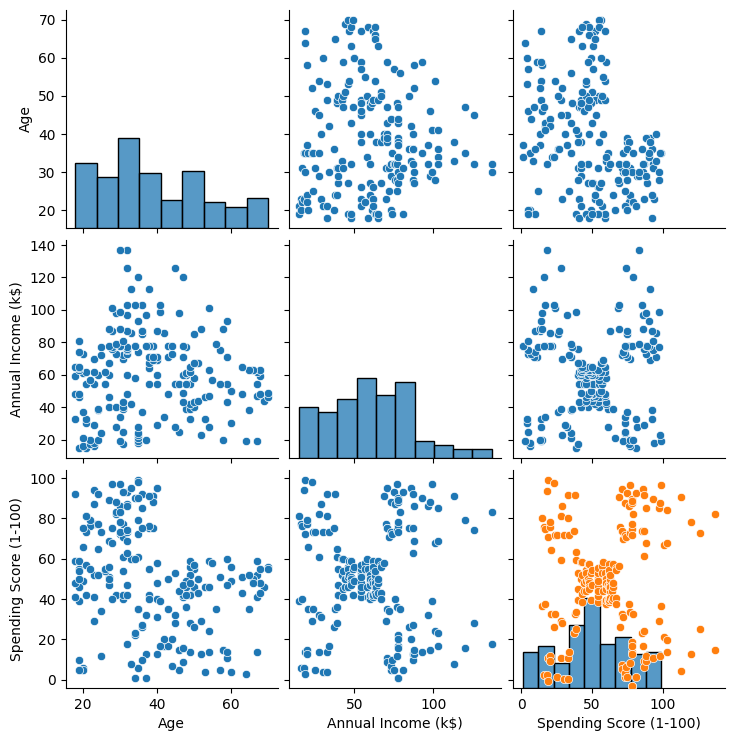

In [9]:
customer_data = customer_data.drop('CustomerID', axis=1)
sns.pairplot(customer_data)
sns.scatterplot(x=customer_data['Annual Income (k$)'],
                y=customer_data['Spending Score (1-100)'])
plt.show()

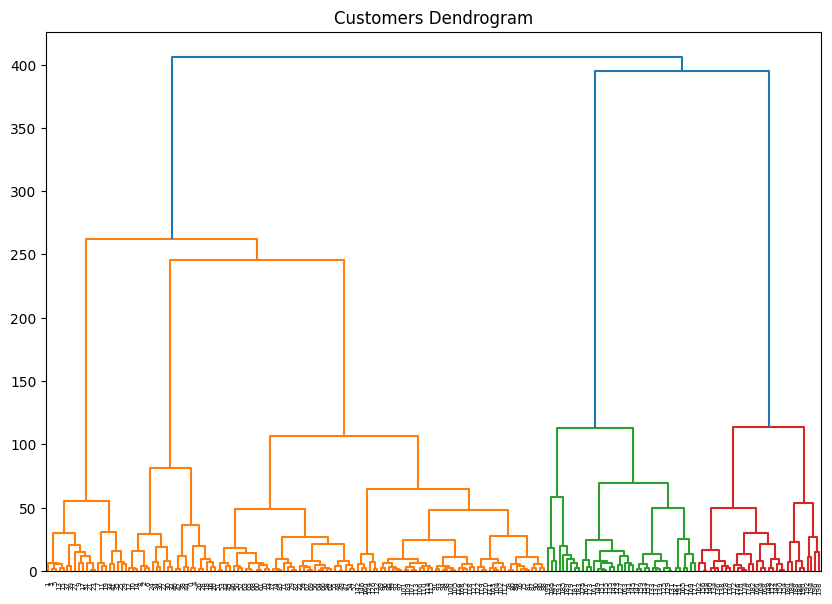

In [10]:
customer_data_oh = customer_data_oh.drop(['Age'], axis=1)
customer_data_oh.shape  # (200, 10)

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = customer_data_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data,
                       method='ward',
                       metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

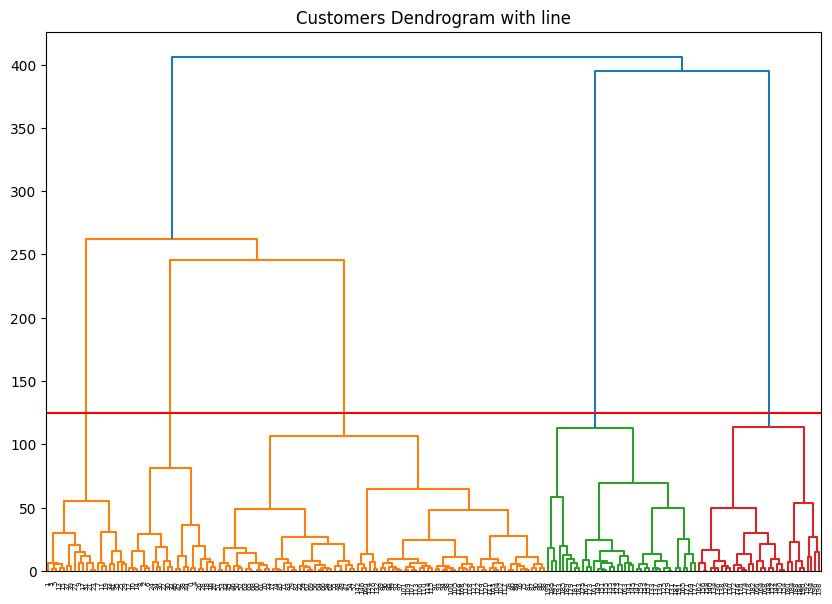

In [13]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(selected_data,
                       method='ward',
                       metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y=125, color='r', linestyle='-')
plt.show()


In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=5,
                                           linkage='ward')

clustering_model.fit(selected_data)
clustering_model.labels_

data_labels = clustering_model.labels_
print(data_labels)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


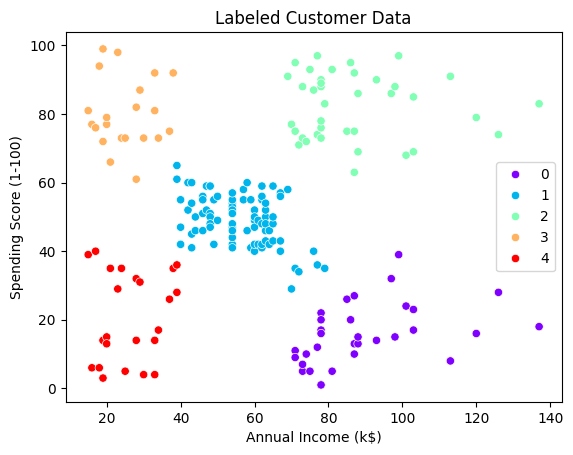

In [16]:
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                data=selected_data,
                hue=data_labels,
                palette="rainbow").set_title('Labeled Customer Data')
plt.show()

In [11]:
import torch
print(torch.cuda.is_available())

False
